In [23]:
import pandas as pd 
import numpy as np 
from keras.datasets import reuters
from keras import models, layers, regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [24]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


Here, the Reuters dataset is loaded. num_words=10000 ensures only the top 10,000 most frequent words are used, making the dataset more manageable. train_data and test_data contain lists of integers representing word indices, while train_labels and test_labels are lists of integers representing the class indices.

In [25]:
print(f'training set : {train_data.shape}')
print(f'test set: {test_data.shape}')
print('training set example')
print(train_data[0])
      

training set : (8982,)
test set: (2246,)
training set example
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [31]:
# Decoding the encoded data back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])#The first three indices are reserved for special tokens, hence i - 3.
print('\nDecoded first training sample:')
print(decoded_newswire) #his decodes the first training example from integers back to words. The result:

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded first training sample:
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [32]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f'\nx_train sample vectorized: {x_train[0]}')
#This converts the sequences of integers into binary vectors, indicating the presence of a word. The result for the first sample:


x_train sample vectorized: [0. 1. 1. ... 0. 0. 0.]


In [33]:
# One-hot encoding the labels
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f'\nOne-hot encoded first label: {one_hot_train_labels[0]}')


One-hot encoded first label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
# Building the network
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/shreeshnadgouda/anacondanew/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Why These Choices?


Combined Effect:
RMSprop as Optimizer: By using RMSprop, the model benefits from adaptive learning rates, which can help in achieving faster convergence and potentially better generalization on the test data.
Categorical Crossentropy as Loss: This loss function is ideal for the classification problem at hand, ensuring that the model learns to output probabilities that match the true distribution of the data.
Accuracy as Metric: Provides a quick and understandable measure of how well the model is performing during training and evaluation.
These choices collectively aim to build a robust model for multi-class classification, ensuring that the model can learn efficiently (through RMSprop), is optimized for the correct objective (through categorical crossentropy), and its performance can be easily monitored (through accuracy).

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3705 - loss: 3.2293 - val_accuracy: 0.6200 - val_loss: 1.8371
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6588 - loss: 1.6357 - val_accuracy: 0.6950 - val_loss: 1.3768
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7365 - loss: 1.2203 - val_accuracy: 0.7290 - val_loss: 1.1950
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7840 - loss: 0.9949 - val_accuracy: 0.7580 - val_loss: 1.0874
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8283 - loss: 0.7843 - val_accuracy: 0.7720 - val_loss: 1.0291
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8617 - loss: 0.6479 - val_accuracy: 0.8040 - val_loss: 0.9474
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8823 - loss: 0.5520 - val_accuracy: 0.8040 - val_loss: 0.9140
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9040 - loss: 0.4552 - val_accuracy: 0.8030 - v

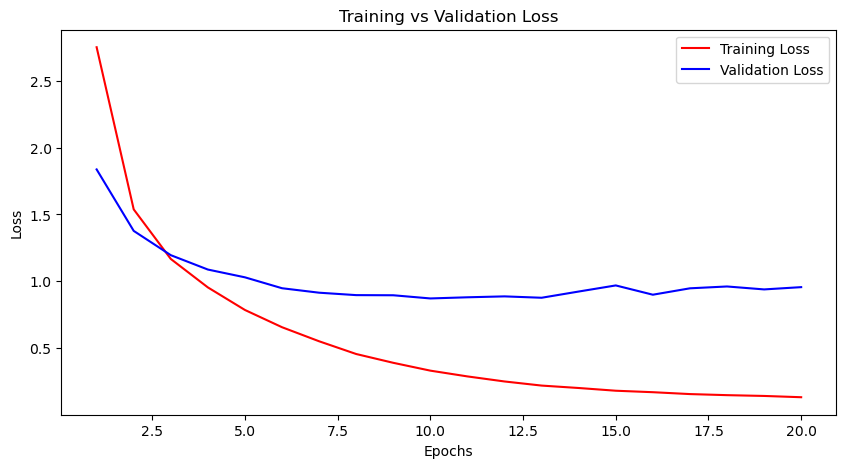

In [35]:
# Splitting data for validation
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# Plotting the training and validation loss
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

Validation Split: The code splits the training data into two parts: a validation set and a training set. This is done to monitor the model's performance on unseen data during training.
First 1000 Samples for Validation: The first 1000 samples from x_train and one_hot_train_labels are set aside as the validation set (x_val and y_val).
Remaining Samples for Training: The remaining samples (from index 1000 onwards) are used for actual training (partial_x_train and partial_y_train).
Why is it done?
Monitoring Generalization: By using a validation set, we can monitor how well the model is generalizing to unseen data during training. This helps in detecting overfitting, where the model performs well on training data but poorly on validation or test data.
Hyperparameter Tuning: The validation set can be used to tune hyperparameters and make decisions about stopping training early if the model's performance on the validation set starts to degrade.

This function plots the training and validation loss over epochs. The plot helps in identifying overfitting or underfitting.

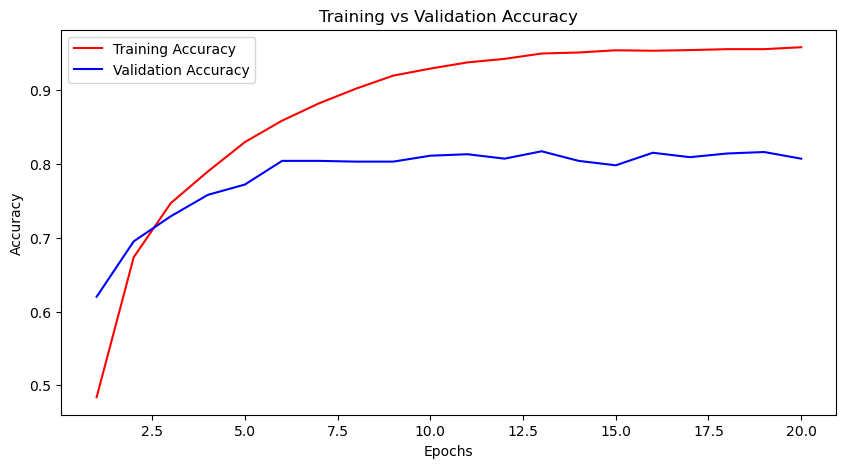

In [36]:
# Plotting the training and validation accuracy
def plot_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history)

This function plots the training and validation accuracy over epochs. It helps in assessing the model's performance.

In [37]:
# Retraining the model with fewer epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
model.fit(partial_x_train,
          partial_y_train, 
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(f'\nTest loss: {results[0]}')
print(f'Test accuracy: {results[1]}')

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3058 - loss: 3.3563 - val_accuracy: 0.6080 - val_loss: 2.0102
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6538 - loss: 1.7885 - val_accuracy: 0.6910 - val_loss: 1.4288
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7284 - loss: 1.2862 - val_accuracy: 0.7460 - val_loss: 1.2074
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7869 - loss: 1.0108 - val_accuracy: 0.7720 - val_loss: 1.0856
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8144 - loss: 0.8472 - val_accuracy: 0.7810 - val_loss: 1.0153
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8493 - loss: 0.7209 - val_accuracy: 0.7940 - val_loss: 0.9575
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.6187 - val_accuracy: 0.7970 - val_loss: 0.9195
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8907 - loss: 0.4973 - val_accuracy: 0.8150 - val_loss: 0.87

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3530 - loss: 3.5002 - val_accuracy: 0.5170 - val_loss: 2.5303
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5320 - loss: 2.2759 - val_accuracy: 0.5710 - val_loss: 1.9135
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5877 - loss: 1.7293 - val_accuracy: 0.5730 - val_loss: 1.7663
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5941 - loss: 1.5960 - val_accuracy: 0.5770 - val_loss: 1.7188
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5902 - loss: 1.5392 - val_accuracy: 0.5710 - val_loss: 1.7052
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6055 - loss: 1.4618 - val_accuracy: 0.5820 - val_loss: 1.7028
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 1.4327 - val_accuracy: 0.5790 - val_loss: 1.7075
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6241 - loss: 1.4084 - val_accuracy: 0.5840 - val_loss:

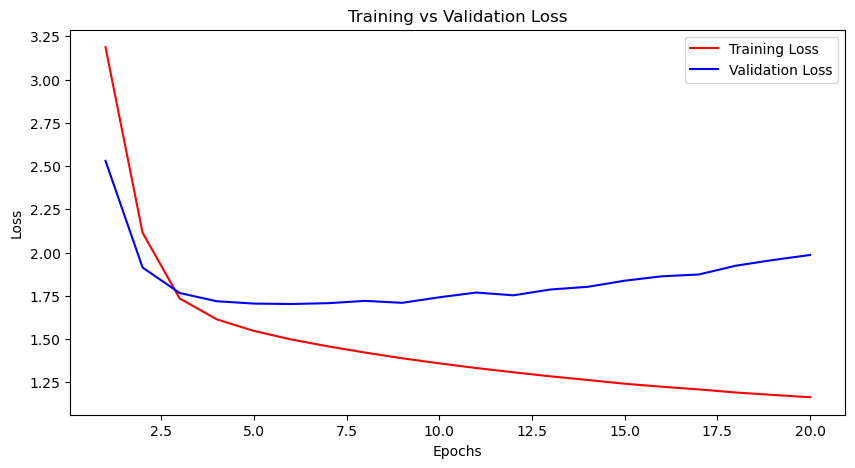

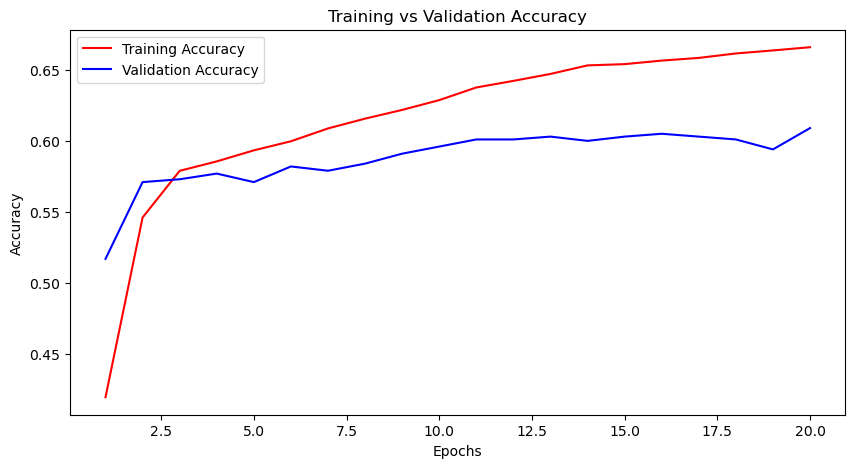

In [39]:
# Experimenting with a model having information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

history_bottleneck = model.fit(partial_x_train,
                               partial_y_train,
                               epochs=20,
                               batch_size=128,
                               validation_data=(x_val, y_val))

results_bottleneck = model.evaluate(x_test, one_hot_test_labels)
print(f'\nBottleneck model - Test loss: {results_bottleneck[0]}')
print(f'Bottleneck model - Test accuracy: {results_bottleneck[1]}')

plot_loss(history_bottleneck)
plot_accuracy(history_bottleneck)